# Data Analysis

In [114]:
###for the explotary analysis section
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
columns = ['id', 'Decision', 'Host_response_time',
           'Host_is_superhost', 'Host_has_profile_pic', 'Host_identity_verified','Neighbourhood',
           'Property_type', 'Room_type', 'Accommodates','Bathrooms_text',
           'Bedrooms', 'Beds',
           'Essentials', 'Cooking',
           'Balcony', 'Parking',
           'Price',
           'Number_of_reviews',
           'Review_scores_rating',
           'Instant_bookable',
           'Month']
#we can split features like below:
categorical = ['Neighbourhood', 'Host_response_time','Property_type', 'Room_type','Bathrooms_text','Month']
continuous = ['Accommodates','Bedrooms', 'Beds','Balcony', 'Parking','Essentials', 'Cooking',
              'Price','Review_scores_rating','Number_of_reviews']
binary = ['Host_is_superhost', 'Host_has_profile_pic', 'Host_identity_verified','Instant_bookable']

In [118]:
#import data and convert bool features to numerical
bool_converter = lambda x: 1 if x == 't' else 0
train_df = pd.read_csv(
    "duke-cs671-fall21-airbnb-availability-data/train.csv",
    converters={
        'Host_is_superhost':bool_converter,
        'Host_has_profile_pic': bool_converter,
        'Host_identity_verified':bool_converter,
        'Instant_bookable':bool_converter
    },
)

test_df = pd.read_csv(
    "duke-cs671-fall21-airbnb-availability-data/test.csv",
    converters={
        'Host_is_superhost':bool_converter,
        'Host_has_profile_pic': bool_converter,
        'Host_identity_verified':bool_converter,
        'Instant_bookable':bool_converter
    }
)

In [119]:
train_df

,id,Decision,Host_response_time,Host_is_superhost,Host_has_profile_pic,Host_identity_verified,Neighbourhood,Property_type,Room_type,Accommodates,...,Beds,Essentials,Cooking,Balcony,Parking,Price,Number_of_reviews,Review_scores_rating,Instant_bookable,Month
0,1,1,within an hour,1,1,1,28806,Entire cabin,Entire home/apt,6,...,3.0,5,5,1,1,$164.00,90,4.93,1,August
1,2,1,within an hour,1,1,1,28804,Entire house,Entire home/apt,4,...,1.0,5,4,1,1,$101.00,522,4.69,1,June
2,3,0,within a few hours,1,1,1,28806,Private room in bungalow,Private room,1,...,1.0,5,3,1,1,$32.00,35,4.83,0,June
3,4,1,within an hour,1,1,1,28803,Entire condominium (condo),Entire home/apt,8,...,5.0,5,5,0,1,$381.00,11,5.00,1,September
4,5,0,within an hour,1,1,1,28805,Entire house,Entire home/apt,6,...,4.0,5,5,1,1,$238.00,63,4.70,0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,7467,1,within an hour,0,1,0,28804,Entire house,Entire home/apt,10,...,6.0,2,5,1,1,$852.00,2,5.00,1,June
7467,7468,1,within an hour,1,1,1,28801,Entire guest suite,Entire home/apt,2,...,1.0,5,3,1,1,$127.00,106,4.98,0,September
7468,7469,1,within an hour,1,1,0,28803,Entire residential home,Entire home/apt,10,...,5.0,5,5,1,1,$325.00,70,4.93,0,August
7469,7470,1,within an hour,1,1,0,28801,Entire loft,Entire home/apt,4,...,2.0,5,5,0,0,$239.00,20,4.95,0,July


In [120]:
test_df

,id,Host_response_time,Host_is_superhost,Host_has_profile_pic,Host_identity_verified,Neighbourhood,Property_type,Room_type,Accommodates,Bathrooms_text,...,Beds,Essentials,Cooking,Balcony,Parking,Price,Number_of_reviews,Review_scores_rating,Instant_bookable,Month
0,1,NaN,1,1,1,28806,Private room in bungalow,Private room,1,1 private bath,...,1.0,4,3,1,1,$58.00,137,4.85,0,September
1,2,within an hour,1,1,1,28805,Entire apartment,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,573,4.93,1,June
2,3,within an hour,1,1,1,28805,Entire rental unit,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,590,4.93,1,August
3,4,within an hour,1,1,1,28805,Entire rental unit,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,600,4.93,1,September
4,5,within an hour,1,1,1,28805,Entire apartment,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,581,4.93,1,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2436,within an hour,0,1,0,28806,Entire guesthouse,Entire home/apt,6,3 baths,...,0.0,1,0,0,1,$115.00,0,NaN,1,September
2436,2437,within an hour,1,1,1,28803,Entire residential home,Entire home/apt,9,3 baths,...,6.0,5,5,1,1,$123.00,0,NaN,1,September
2437,2438,within a few hours,1,1,1,28806,Entire residential home,Entire home/apt,14,4 baths,...,7.0,4,1,0,1,$681.00,0,NaN,1,September
2438,2439,within an hour,1,1,1,28704,Private room in residential home,Private room,2,1 private bath,...,1.0,5,2,0,1,$54.00,0,NaN,1,September


In [121]:
#check the nan values
print(train_df.isna().sum())
print(test_df.isna().sum())
#I find there are nan values in "Host_response_time","Bedrooms","Review_scores_rating","Beds".

id                          0
Decision                    0
Host_response_time        858
Host_is_superhost           0
Host_has_profile_pic        0
Host_identity_verified      0
Neighbourhood               0
Property_type               0
Room_type                   0
Accommodates                0
Bathrooms_text              0
Bedrooms                  585
Beds                       13
Essentials                  0
Cooking                     0
Balcony                     0
Parking                     0
Price                       0
Number_of_reviews           0
Review_scores_rating      395
Instant_bookable            0
Month                       0
dtype: int64
id                          0
Host_response_time        293
Host_is_superhost           0
Host_has_profile_pic        0
Host_identity_verified      0
Neighbourhood               0
Property_type               0
Room_type                   0
Accommodates                0
Bathrooms_text              0
Bedrooms                  1

In [122]:
#process price features: str to numerical
train_df['Price'] = train_df['Price'].replace({'\$':'',',':''},regex = True)
train_df['Price'] = train_df['Price'].astype('float')

test_df['Price'] = test_df['Price'].replace({'\$':'',',':''},regex = True)
test_df['Price'] = test_df['Price'].astype('float')

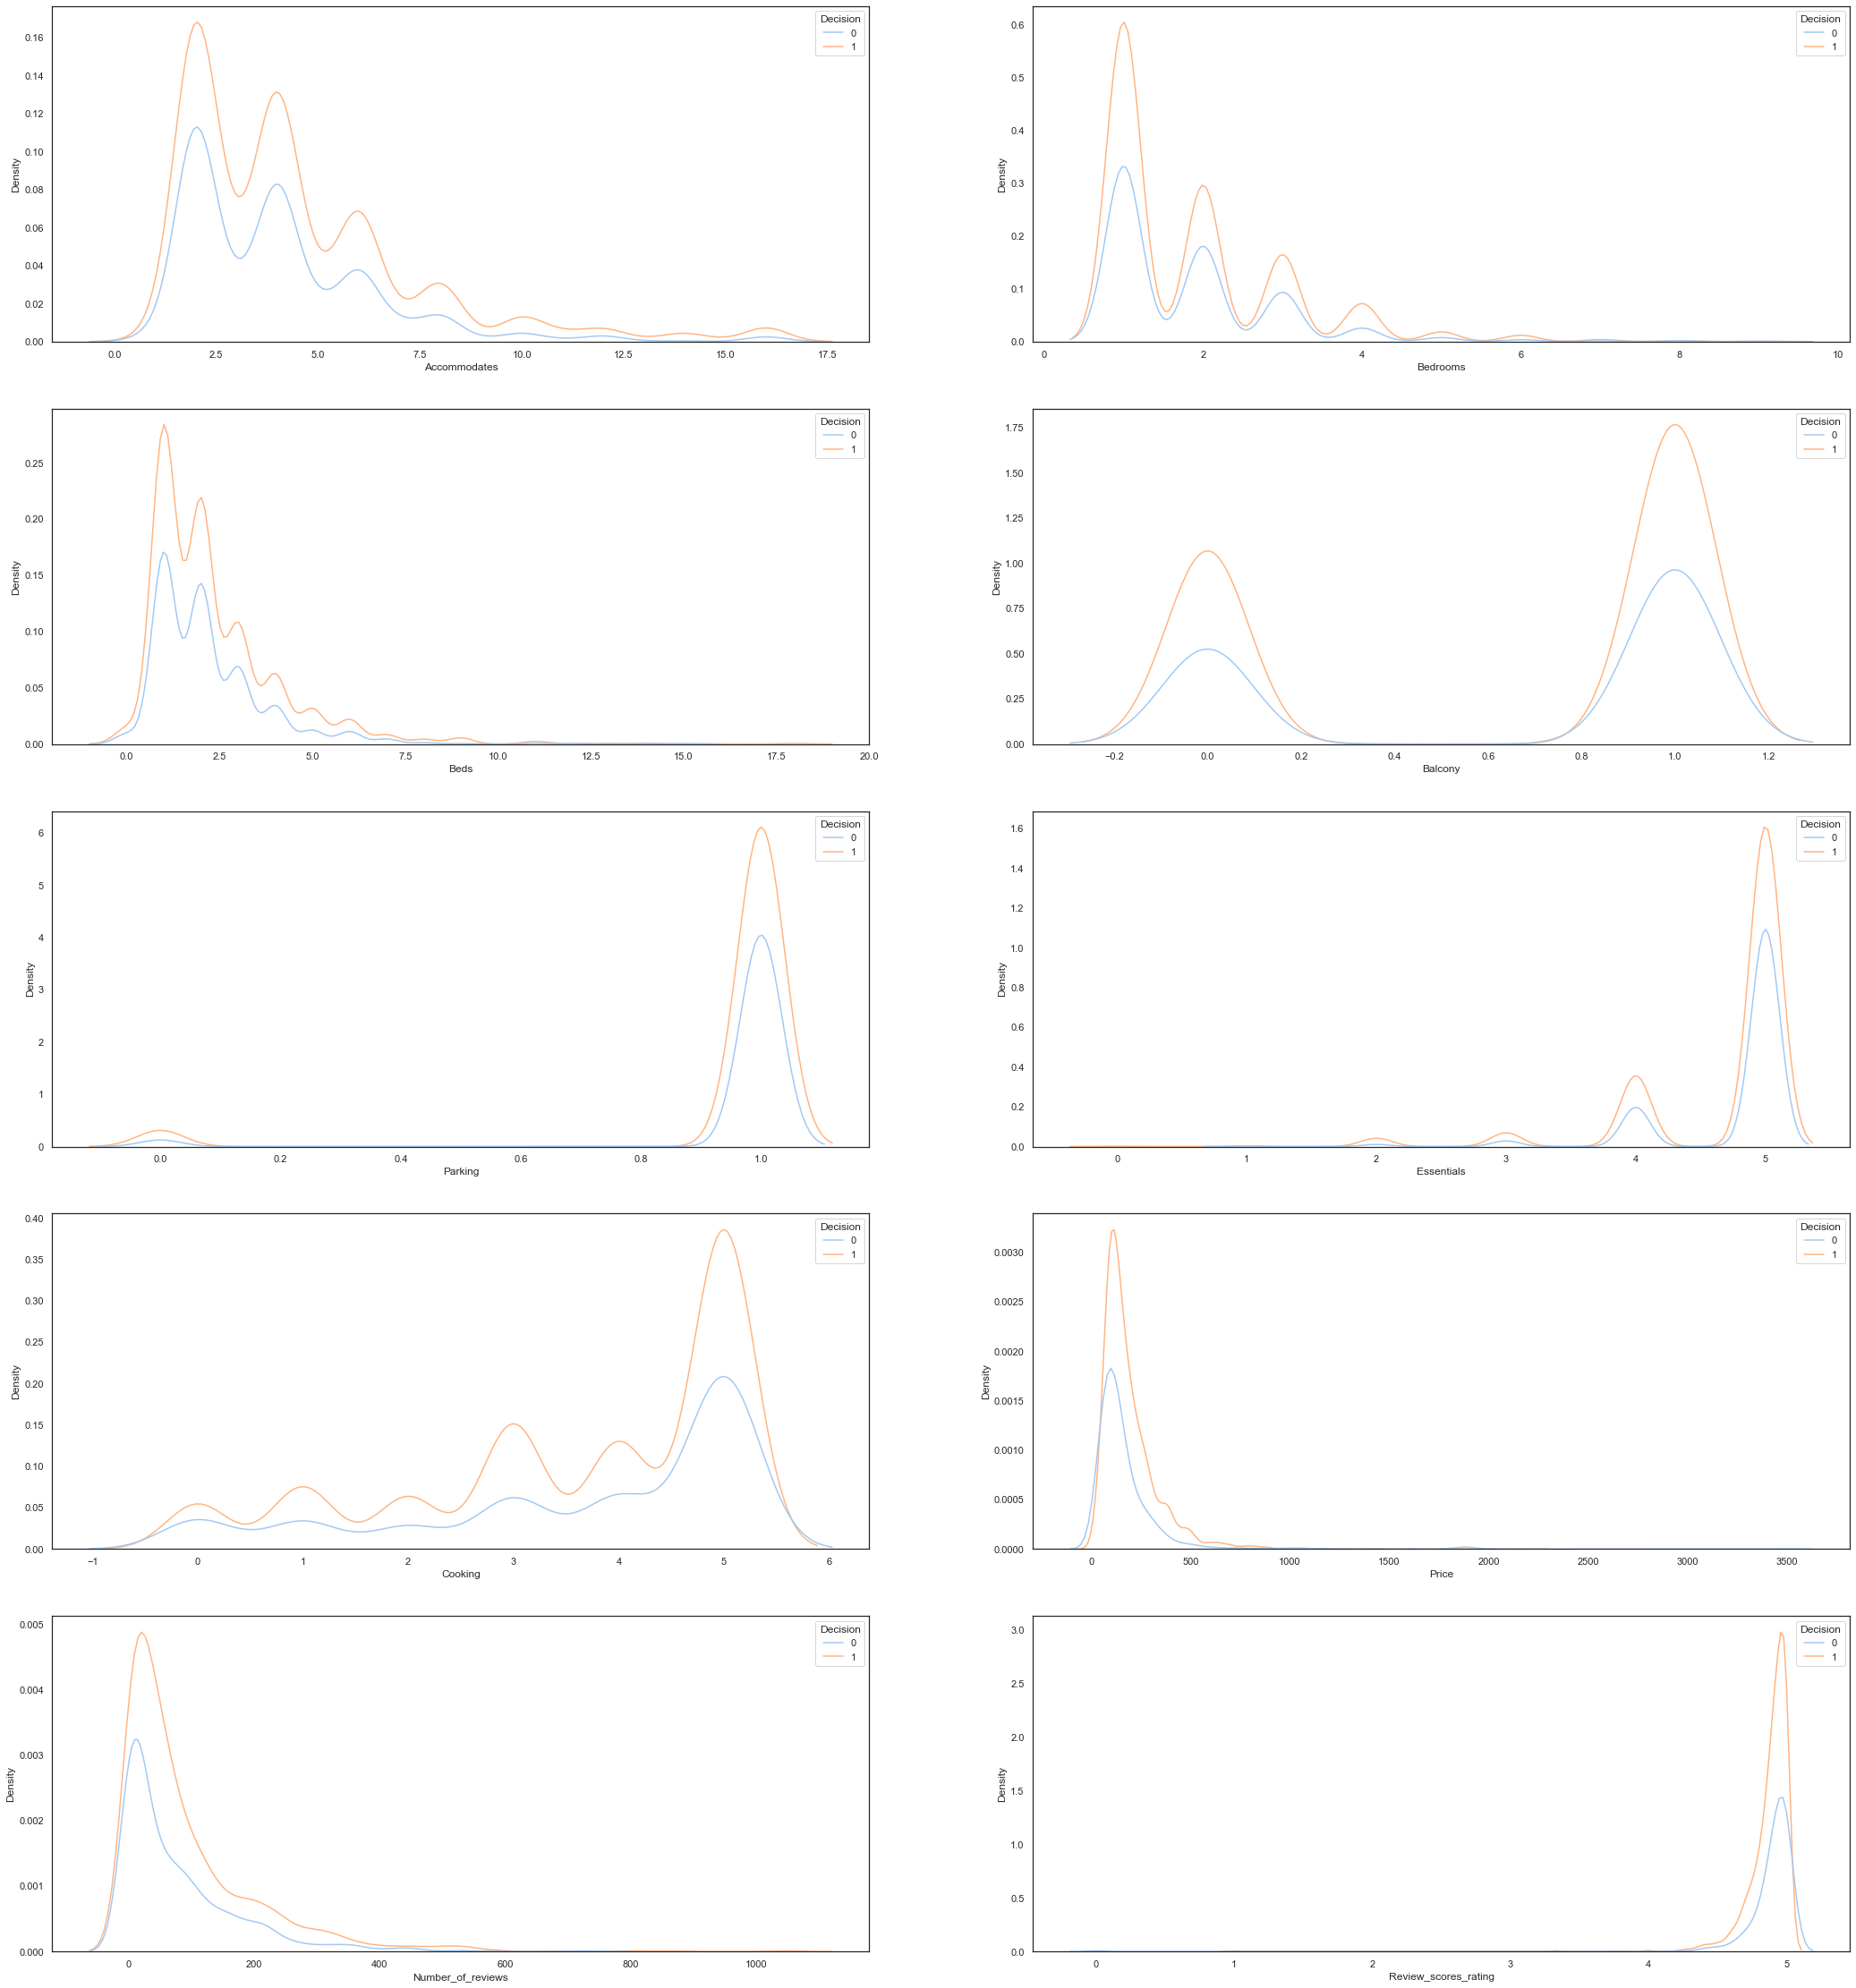

In [130]:
#continuous features: draw kde plots
# draw kde plots for some of the continuous features
fig, ax = plt.subplots(5, 2,
                       figsize=(18,20))
sns.kdeplot(data=train_df, x='Accommodates', hue='Decision', palette='pastel', ax=ax[0, 0])
sns.kdeplot(data=train_df, x='Bedrooms', hue='Decision', palette='pastel', ax=ax[0, 1])
sns.kdeplot(data=train_df, x='Beds', hue='Decision', palette='pastel', ax=ax[1,0])
sns.kdeplot(data=train_df, x='Balcony', hue='Decision', palette='pastel', ax=ax[1, 1])
sns.kdeplot(data=train_df, x='Parking', hue='Decision', palette='pastel', ax=ax[2, 0])
sns.kdeplot(data=train_df, x='Essentials', hue='Decision', palette='pastel', ax=ax[2, 1])
sns.kdeplot(data=train_df, x='Cooking', hue='Decision', palette='pastel', ax=ax[3, 0])
sns.kdeplot(data=train_df, x='Price', hue='Decision', palette='pastel', ax=ax[3, 1])
sns.kdeplot(data=train_df, x='Number_of_reviews', hue='Decision', palette='pastel', ax=ax[4, 0 ])
sns.kdeplot(data=train_df, x='Review_scores_rating', hue='Decision', palette='pastel', ax=ax[4, 1])
#fig.tight_layout()
fig.savefig("figure/eda_continuous.pdf")


In [131]:
plt.close()

In [132]:
#then, visualize the categorical features. Firstly, preprocess the feature with nan values: "Host_response_time".
#fill nan value
train_df["Host_response_time"] = train_df["Host_response_time"].fillna(value="missing") 
test_df["Host_response_time"] = test_df["Host_response_time"].fillna(value="missing")

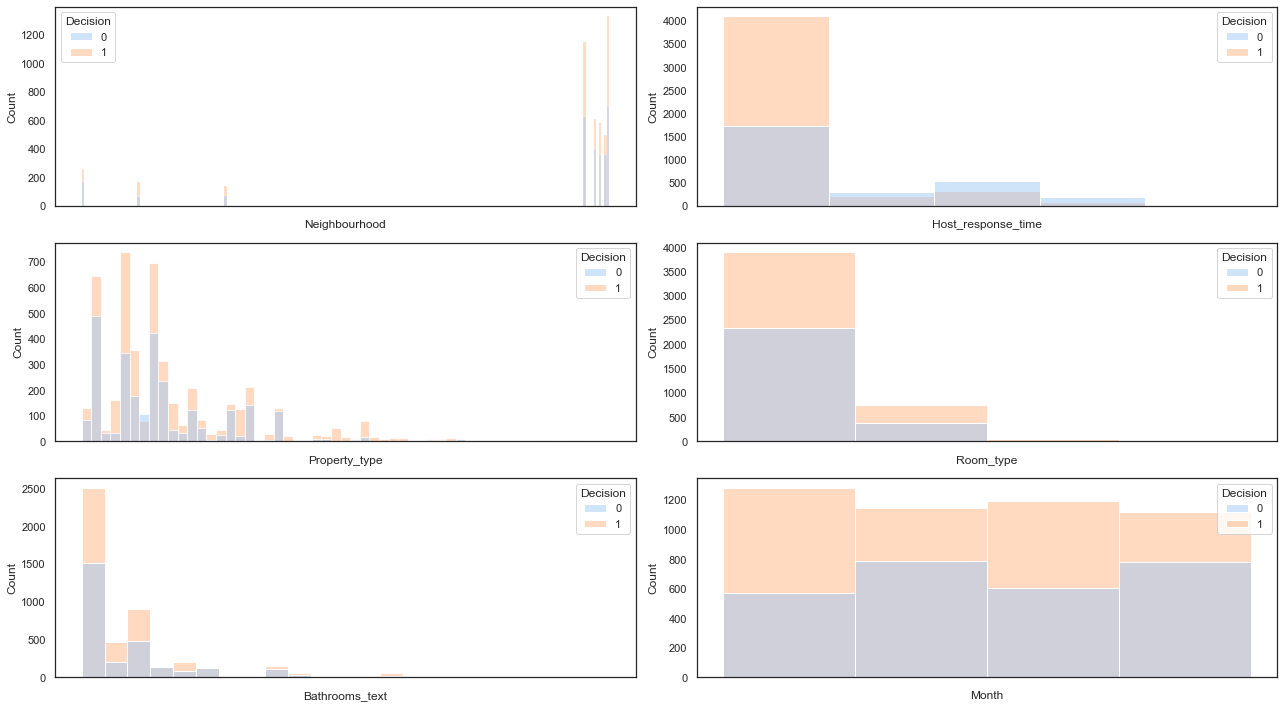

In [133]:
#categorical features: draw histograms
categorical = ['Neighbourhood', 'Host_response_time','Property_type', 'Room_type','Bathrooms_text','Month']
fig, ax = plt.subplots(3, 2, figsize=(18, 10))
h1 = sns.histplot(data=train_df, x='Neighbourhood', hue='Decision', palette='pastel', ax=ax[0, 0])
h2 = sns.histplot(data=train_df, x='Host_response_time', hue='Decision', palette='pastel', ax=ax[0, 1])
h3 = sns.histplot(data=train_df, x='Property_type', hue='Decision', palette='pastel', ax=ax[1, 0]) 
h4 = sns.histplot(data=train_df, x='Room_type', hue='Decision', palette='pastel', ax=ax[1, 1])
h5 = sns.histplot(data=train_df, x='Bathrooms_text', hue='Decision', palette='pastel', ax=ax[2, 0])
h6 = sns.histplot(data=train_df, x='Month', hue='Decision', palette='pastel', ax=ax[2, 1])

h1.set(xticklabels=[])
h2.set(xticklabels=[])
h3.set(xticklabels=[])
h4.set(xticklabels=[])
h5.set(xticklabels=[])
h6.set(xticklabels=[])
h6.set(xticklabels=[])

fig.tight_layout()
fig.savefig("figure/eda_categorical.pdf")


In [134]:
plt.close()

From figures, we can see that features:"Property_type" have too many labels. Considering generalization

In [135]:
train_df.Property_type.value_counts()

Entire house                           1132
Entire guest suite                     1118
Entire residential home                1082
Entire apartment                        550
Entire rental unit                      536
Private room in house                   355
Private room in residential home        331
Entire cottage                          269
Entire guesthouse                       246
Entire cabin                            216
Entire condominium                      192
Entire condominium (condo)              192
Entire bungalow                         187
Private room in bed and breakfast       146
Entire townhouse                        137
Tiny house                               98
Entire loft                              98
Private room in bungalow                 77
Private room in guest suite              70
Room in bed and breakfast                56
Room in boutique hotel                   34
Campsite                                 34
Entire chalet                   

In [136]:
train_df.Property_type = train_df.Property_type.apply(lambda x: 'Private type' if 'Private' in x else x)
train_df.Property_type = train_df.Property_type.apply(lambda x: 'Entire type' if 'Entire' in x else x)
train_df.loc[~train_df.Property_type.isin(['Entire type', 'Private type']), 'Property_type'] = 'Others'

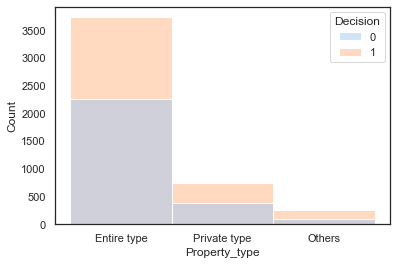

In [138]:
#train_df['Property_type'].hist()
fig = plt.figure()
h1 = sns.histplot(data=train_df, x='Property_type', hue='Decision', palette='pastel') 
fig.savefig("figure/eda_categorical_property_type_transform.pdf")

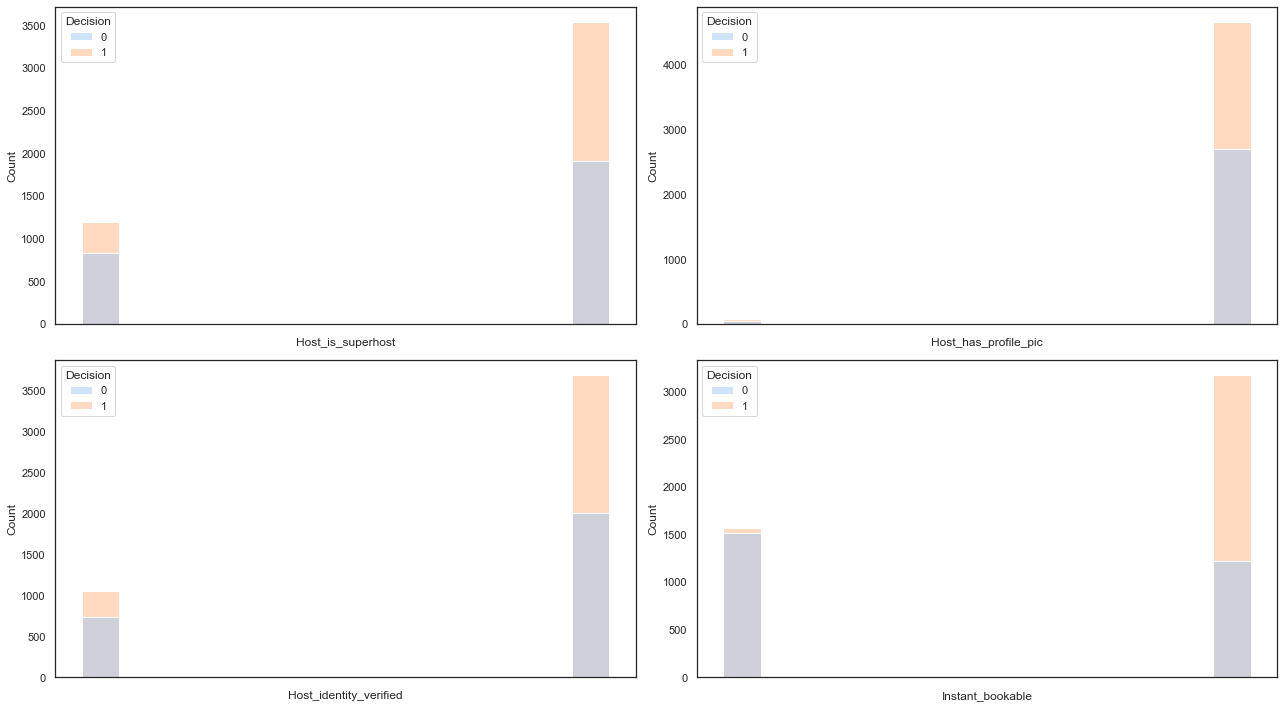

In [139]:
#binary festures: histograms
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
h1 = sns.histplot(data=train_df, x='Host_is_superhost', hue='Decision', palette='pastel', ax=ax[0, 0])
h2 = sns.histplot(data=train_df, x='Host_has_profile_pic', hue='Decision', palette='pastel', ax=ax[0, 1])
h3 = sns.histplot(data=train_df, x='Host_identity_verified', hue='Decision', palette='pastel', ax=ax[1, 0])
h4 = sns.histplot(data=train_df, x='Instant_bookable', hue='Decision', palette='pastel', ax=ax[1, 1])

h1.set(xticklabels=[])
h2.set(xticklabels=[])
h3.set(xticklabels=[])
h4.set(xticklabels=[])

fig.tight_layout()
fig.savefig("figure/eda_binary.pdf")

In [140]:
plt.close()

In [141]:
#drop features"Host_has_profile_pic"
train_df = train_df.drop(columns=['Host_has_profile_pic'])
test_df = test_df.drop(columns=['Host_has_profile_pic'])

In [142]:
#normalization contibuous features
scaler = StandardScaler()
scaler.fit(train_df[continuous])
train_df[continuous] = scaler.transform(train_df[continuous])
test_df[continuous] = scaler.transform(test_df[continuous])

In [143]:
#draw heatmap to see multi colinearity correlation between features, doing features selection
def draw_heatmap(df,save_name):
    sns.set(style="white")
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    #f, ax = plt.subplots(figsize=figsize)
    fig = plt.figure(figsize=(18,10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap,linewidths=0.5,cbar_kws={"shrink": .5},vmax=corr[corr != 1.0].max().max());
    plt.savefig("figure/"+save_name)
     

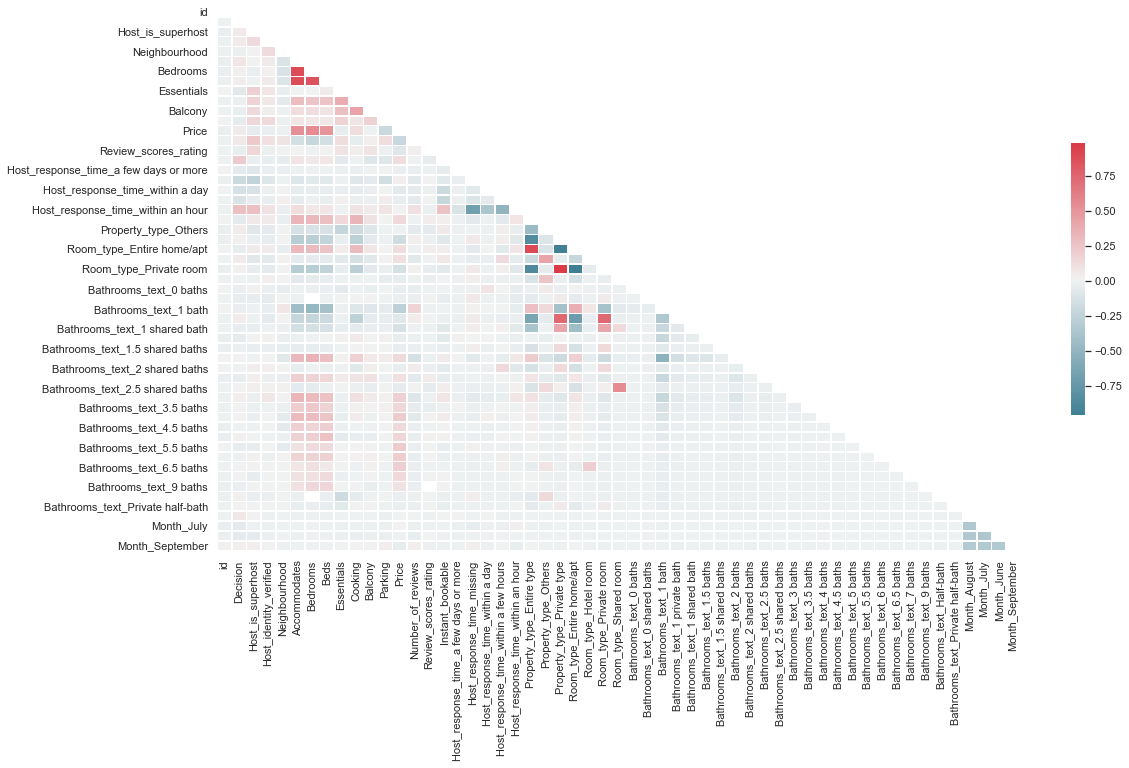

In [144]:
transformed_df = pd.get_dummies(train_df)
draw_heatmap(transformed_df,'heatmap_1.pdf')

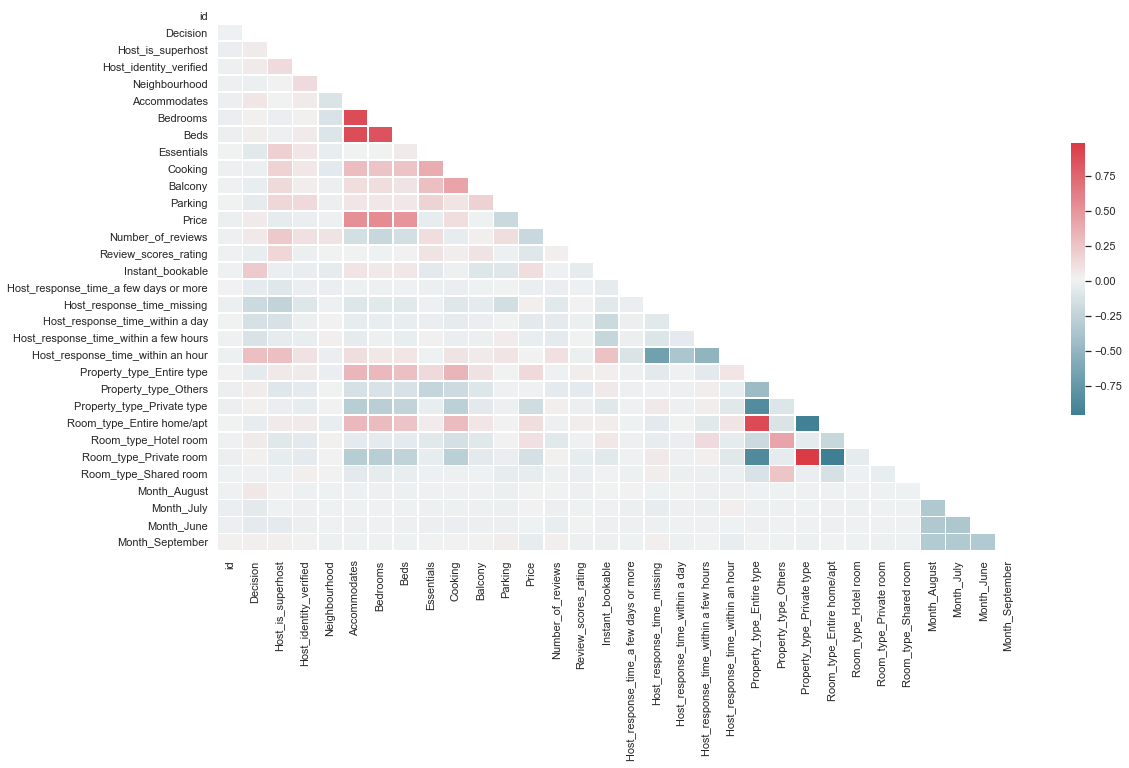

In [145]:
train_df2 = train_df.drop(columns=['Bathrooms_text'])
transformed_df = pd.get_dummies(train_df2)
draw_heatmap(transformed_df,"heatmap_2.pdf")

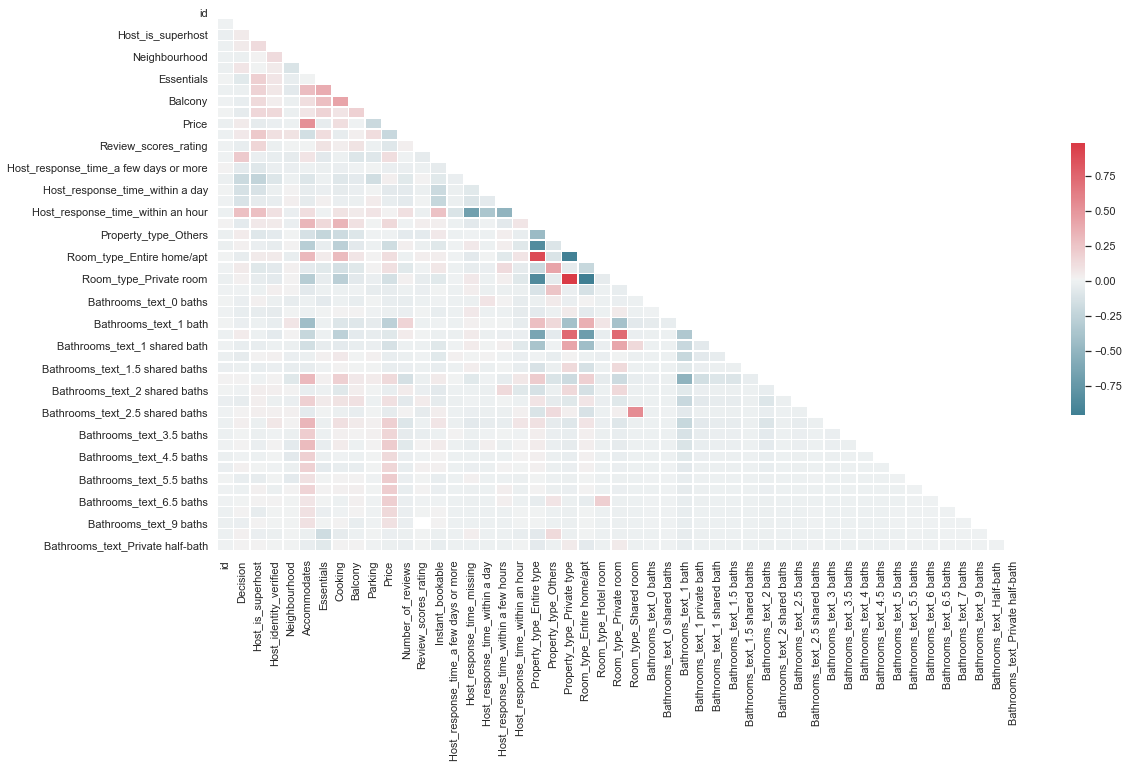

In [146]:
#delete: Bedrooms, Beds,Property_type,Month
train_df3 = train_df.drop(columns=['Bedrooms', 'Beds','Month'])
transformed_df = pd.get_dummies(train_df3)
draw_heatmap(transformed_df,"heatmap_3.pdf")

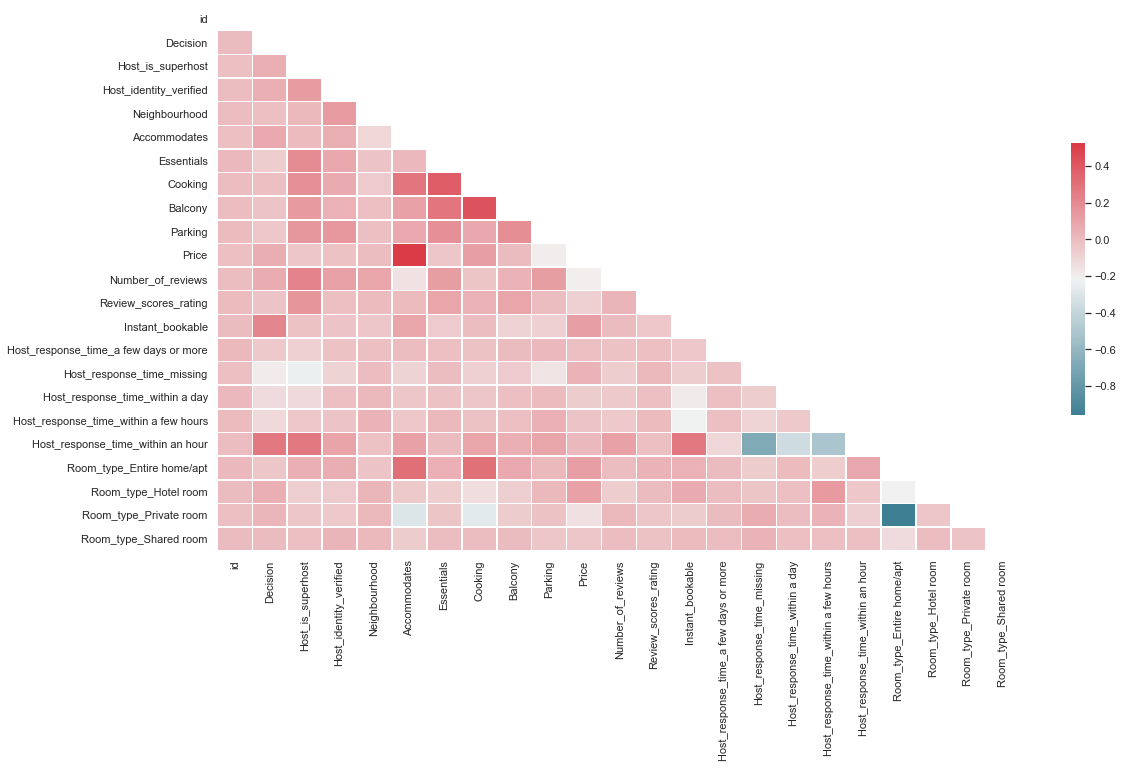

In [147]:
#delete: Bedrooms, Beds,Property_type
train_df4 = train_df.drop(columns=['Bedrooms', 'Beds','Month','Property_type','Bathrooms_text'])
transformed_df = pd.get_dummies(train_df4)
draw_heatmap(transformed_df,"heatmap_4.pdf")

In [148]:
#so it is improper to drop "property_type"

In [149]:
#Therefore we drop 4 features in total: 'Bedrooms', 'Beds','Month''Host_has_profile_pic'
train_df = train_df.drop(columns = ['Bedrooms', 'Beds','Month'])
test_df = test_df.drop(columns = ['Bedrooms', 'Beds','Month'])

In [150]:
train_df.isna().sum()

id                          0
Decision                    0
Host_response_time          0
Host_is_superhost           0
Host_identity_verified      0
Neighbourhood               0
Property_type               0
Room_type                   0
Accommodates                0
Bathrooms_text              0
Essentials                  0
Cooking                     0
Balcony                     0
Parking                     0
Price                       0
Number_of_reviews           0
Review_scores_rating      395
Instant_bookable            0
dtype: int64

In [151]:
test_df.isna().sum()

id                          0
Host_response_time          0
Host_is_superhost           0
Host_identity_verified      0
Neighbourhood               0
Property_type               0
Room_type                   0
Accommodates                0
Bathrooms_text              0
Essentials                  0
Cooking                     0
Balcony                     0
Parking                     0
Price                       0
Number_of_reviews           0
Review_scores_rating      274
Instant_bookable            0
dtype: int64